In [1]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw
from tqdm import tqdm
from experience_replay_buffer import ExperienceReplayBuffer

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()


⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


  0%|          | 0/2000 [00:00<?, ?it/s]

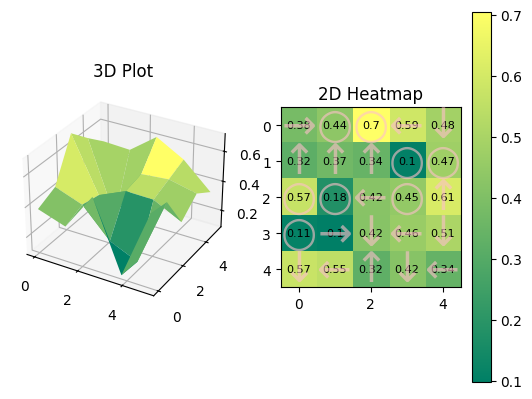

  6%|▋         | 130/2000 [00:00<00:02, 684.34it/s]

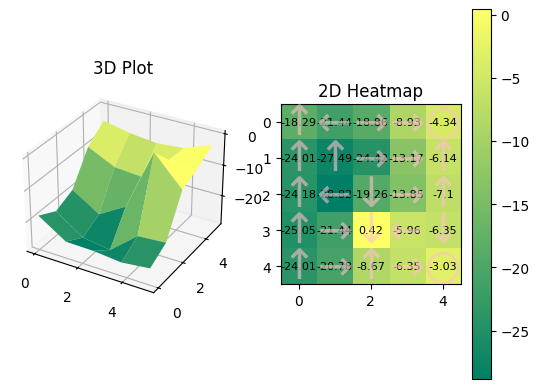

 17%|█▋        | 339/2000 [00:00<00:02, 768.67it/s]

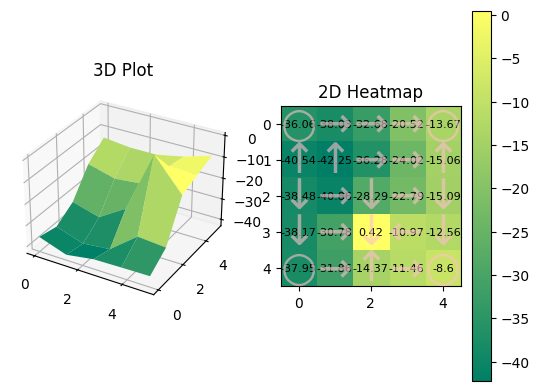

 28%|██▊       | 562/2000 [00:00<00:01, 786.01it/s]

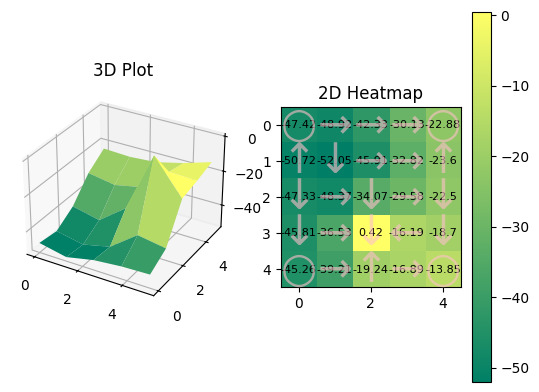

 40%|███▉      | 791/2000 [00:01<00:01, 814.29it/s]

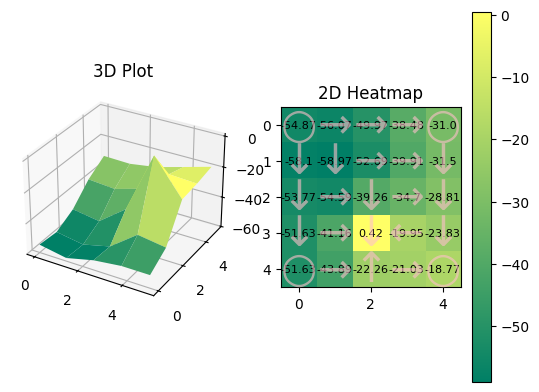

 44%|████▍     | 888/2000 [00:01<00:01, 668.61it/s]

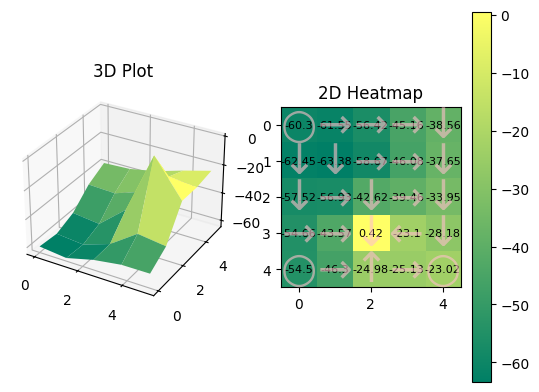

 56%|█████▋    | 1130/2000 [00:01<00:01, 736.76it/s]

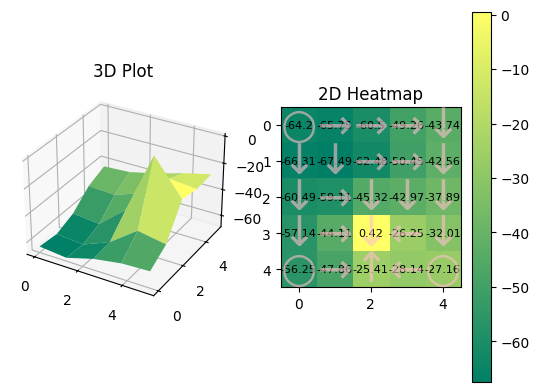

 67%|██████▋   | 1349/2000 [00:01<00:00, 769.49it/s]

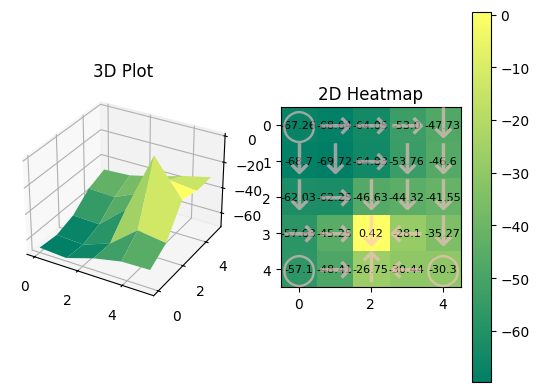

 78%|███████▊  | 1562/2000 [00:02<00:00, 776.49it/s]

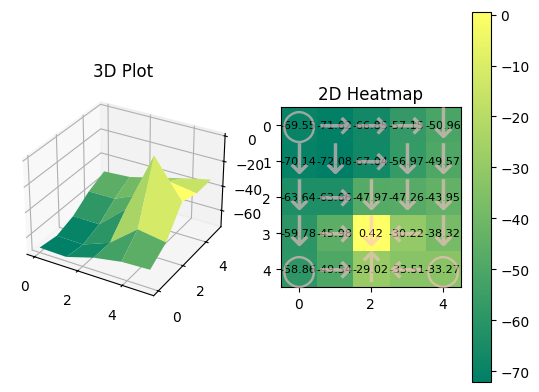

 90%|████████▉ | 1796/2000 [00:02<00:00, 712.73it/s]

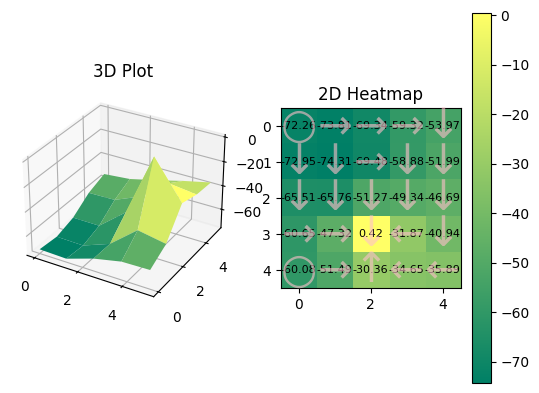

100%|██████████| 2000/2000 [00:02<00:00, 679.17it/s]


In [3]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
experience_pool = ExperienceReplayBuffer(max_size=10000)
for traj in episodes:
    for exp in traj:
        experience_pool.add_experience(exp)

action_values = np.random.rand(25, 5)
learning_rate = 0.01
gamma = 0.99
batch_size = 500

for _ in tqdm(range(2000)):
    exps = experience_pool.sample_exps(batch_size=batch_size)
    for trajectory in exps:
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
        next_action_value = action_values[nextState][nextAction]
        target = tmpscore + (1.0 - terminal) * gamma * next_action_value

        TD_error = action_values[tmpstate][tmpaction] - target
        action_values[tmpstate][tmpaction] -= learning_rate * TD_error
    if _ % 200 == 0:
        state_values = np.sum(policy * action_values, axis=1)
        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)
